<a href="https://colab.research.google.com/github/wp225/sklearn/blob/main/decision_treee_pruning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_iris 
import numpy as np 
import matplotlib.pyplot as plt 

In [ ]:
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn import tree
from sklearn.metrics import accuracy_score

In [ ]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

In [ ]:
!pip install opendatasets 
import opendatasets as od

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
od.download('https://www.kaggle.com/datasets/gabrielsantello/cars-purchase-decision-dataset')

Skipping, found downloaded files in "./cars-purchase-decision-dataset" (use force=True to force download)


In [ ]:
import pandas as pd 
df=pd.read_csv('/content/cars-purchase-decision-dataset/car_data.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


In [ ]:
df_numeric=df.replace(to_replace=['Male','Female'],value=[1,0])


array([[<Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'AnnualSalary'}>,
        <Axes: title={'center': 'Purchased'}>]], dtype=object)

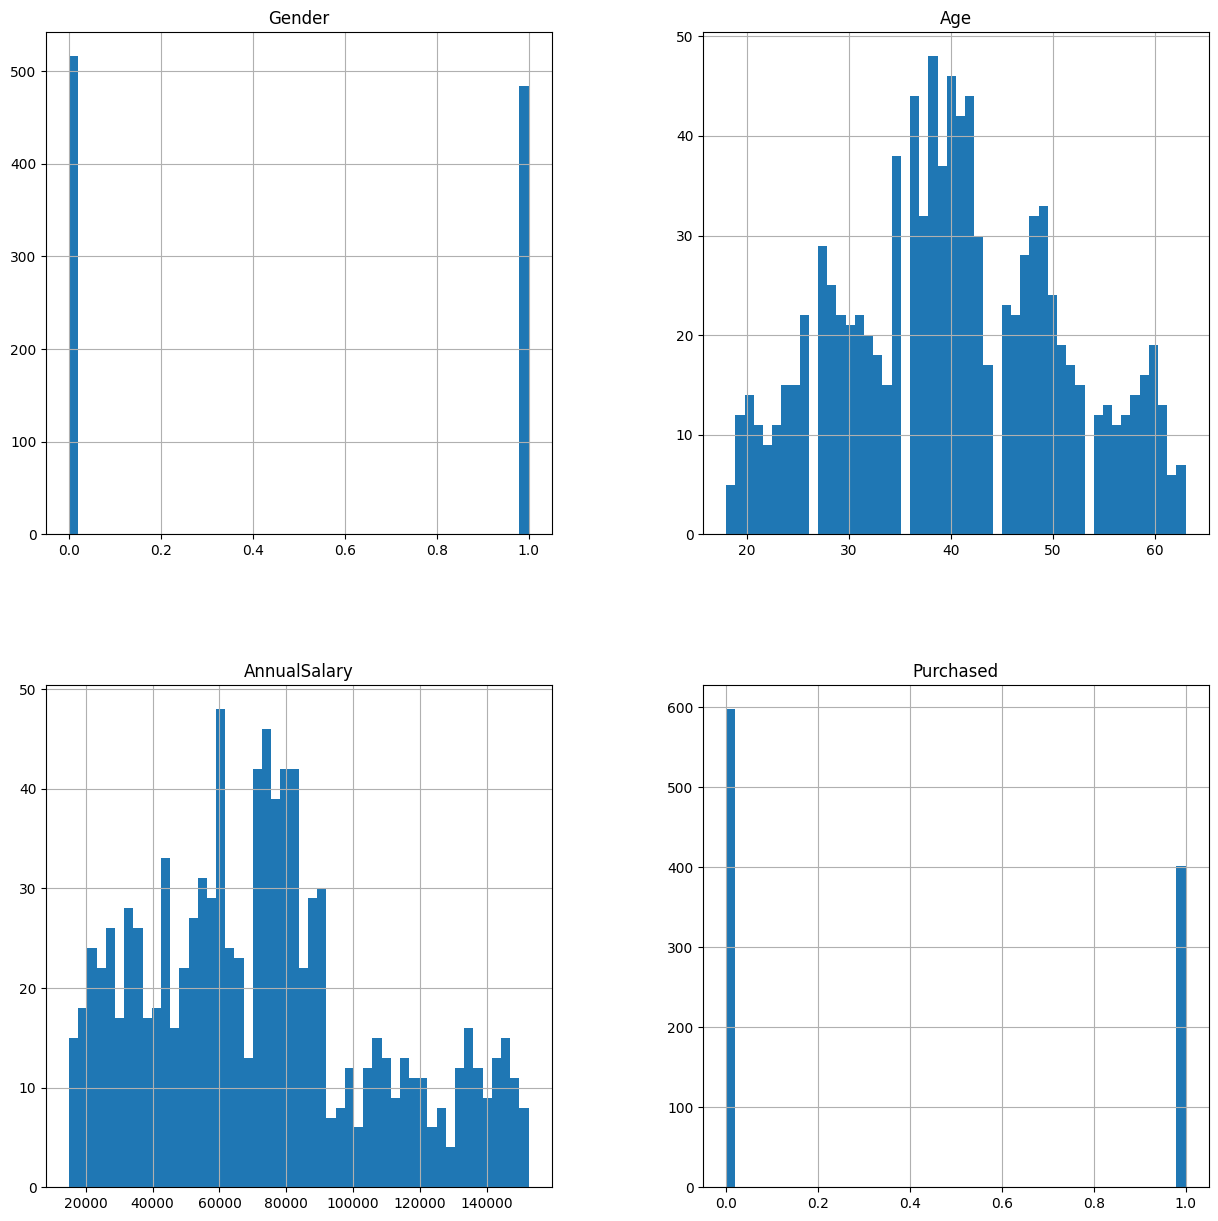

In [ ]:
df_final=df_numeric.drop('User ID',axis=1)
df_final.hist(bins=50,figsize=[15,15])

In [ ]:
X=df_final.drop('Purchased',axis=1)
y=df_final['Purchased']
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=11,shuffle=True)

In [ ]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train_std=scaler.transform(X_train)
X_test_std=scaler.transform(X_test)

In [ ]:
model=tree.DecisionTreeClassifier()
model.fit(X_train_std,y_train)

DecisionTreeClassifier()

In [ ]:
tree.plot_tree(model)

In [ ]:
dot_data=export_graphviz(model,filled=True,
                             class_names=['0','1'],
                             )
graph=graph_from_dot_data(dot_data)
graph.write_png('model.png')

True

In [ ]:
df.columns

Index(['User ID', 'Gender', 'Age', 'AnnualSalary', 'Purchased'], dtype='object')

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report 
print(classification_report(y_test,model.predict(X_test_std)))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       149
           1       0.84      0.90      0.87       101

    accuracy                           0.89       250
   macro avg       0.89      0.89      0.89       250
weighted avg       0.89      0.89      0.89       250



In [ ]:
print(confusion_matrix(y_test,model.predict(X_test_std)))

[[132  17]
 [ 10  91]]


In [ ]:

model_simpler=tree.DecisionTreeClassifier(criterion='entropy',max_depth=4)
model_simpler.fit(X_train_std,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [ ]:
print(classification_report(y_test,model_simpler.predict(X_test_std)))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       149
           1       0.88      0.91      0.90       101

    accuracy                           0.92       250
   macro avg       0.91      0.92      0.91       250
weighted avg       0.92      0.92      0.92       250



In [ ]:
print(confusion_matrix(y_test,model_simpler.predict(X_test_std)))

[[137  12]
 [  9  92]]


In [ ]:
dot_data_simpler=export_graphviz(model_simpler,filled=True,
                                 class_names=['0','1'])
graph_simpler=graph_from_dot_data(dot_data_simpler)
graph_simpler.write_png('model_final.png')

True

In [ ]:
model.tree_.max_depth

17

In [ ]:
model_simpler.tree_.max_depth

4

**depth of decision tree reduced from 17 to 4 **

In [ ]:
path=model.cost_complexity_pruning_path(X_train_std,y_train)

In [ ]:
alpha=path['ccp_alphas']
alpha

array([0.        , 0.0004    , 0.0004    , 0.00065248, 0.00074074,
       0.00077778, 0.0008    , 0.0008    , 0.00083333, 0.00087619,
       0.00092593, 0.00100741, 0.00103986, 0.00106667, 0.00111111,
       0.0011358 , 0.00114286, 0.00116667, 0.00124444, 0.00142222,
       0.00158307, 0.0015873 , 0.0016    , 0.00182857, 0.0018377 ,
       0.002     , 0.00200635, 0.00213333, 0.00227143, 0.00228571,
       0.00243396, 0.00253968, 0.00286138, 0.00340035, 0.0035    ,
       0.00391987, 0.00488204, 0.00491331, 0.00608475, 0.00830184,
       0.00867051, 0.11811711, 0.18901164])

In [ ]:
accuracy_train=[]
accuracy_test=[]
for i in alpha:
  tree_=tree.DecisionTreeClassifier(ccp_alpha=i)
  tree_.fit(X_train_std,y_train)
  accuracy_train.append(accuracy_score(y_train,tree_.predict(X_train_std)))
  accuracy_test.append(accuracy_score(y_test,tree_.predict(X_test_std)))


<function matplotlib.pyplot.show(close=None, block=None)>

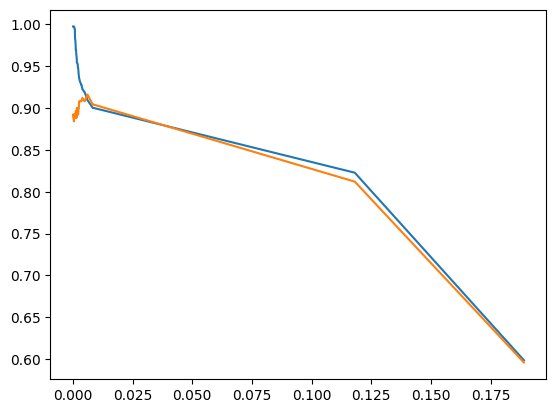

In [ ]:
plt.plot(alpha,accuracy_train)
plt.plot(alpha,accuracy_test)
plt.show